# Decision Tree Regressor Air Quality Index Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/real_data/real_combine.csv')

In [4]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [5]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

In [6]:
df=df.dropna()

In [7]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [9]:
## check null values
x.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...    ...
1084  False  False  False  False  False  False  False  False
1085  False  False  False  False  False  False  False  False
1086  False  False  False  False  False  False  False  False
1087  False  False  False  False  False  False  False  False
1088  False  False  False  False  False  False  False  False

[1088 rows x 8 columns]

In [10]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1084    False
1085    False
1086    False
1087    False
1088    False
Name: PM 2.5, Length: 1088, dtype: bool

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.963416  0.957227 -0.883207 -0.488919  0.625547  0.320218   
TM      0.963416  1.000000  0.889979 -0.826008 -0.576799  0.598727  0.303218   
Tm      0.957227  0.889979  1.000000 -0.912333 -0.275047  0.547490  0.312165   
SLP    -0.883207 -0.826008 -0.912333  1.000000  0.231971 -0.483494 -0.325862   
H      -0.488919 -0.576799 -0.275047  0.231971  1.000000 -0.489597 -0.356241   
VV      0.625547  0.598727  0.547490 -0.483494 -0.489597  1.000000  0.369851   
V       0.320218  0.303218  0.312165 -0.325862 -0.356241  0.369851  1.000000   
VM      0.276548  0.285671  0.244408 -0.269129 -0.368694  0.325963  0.780952   
PM 2.5 -0.629693 -0.565459 -0.661733  0.605637  0.166577 -0.593327 -0.327917   

              VM    PM 2.5  
T       0.276548 -0.629693  
TM      0.285671 -0.565459  
Tm      0.244408 -0.661733  
SLP    -0.269129  0.605637  
H      -0.368694  0.166577  
VV      0.325963 -0.593327  
V       0.780952 -0.327917  
VM      1.000000 -0.262848  
PM 2.5 -0.262848  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

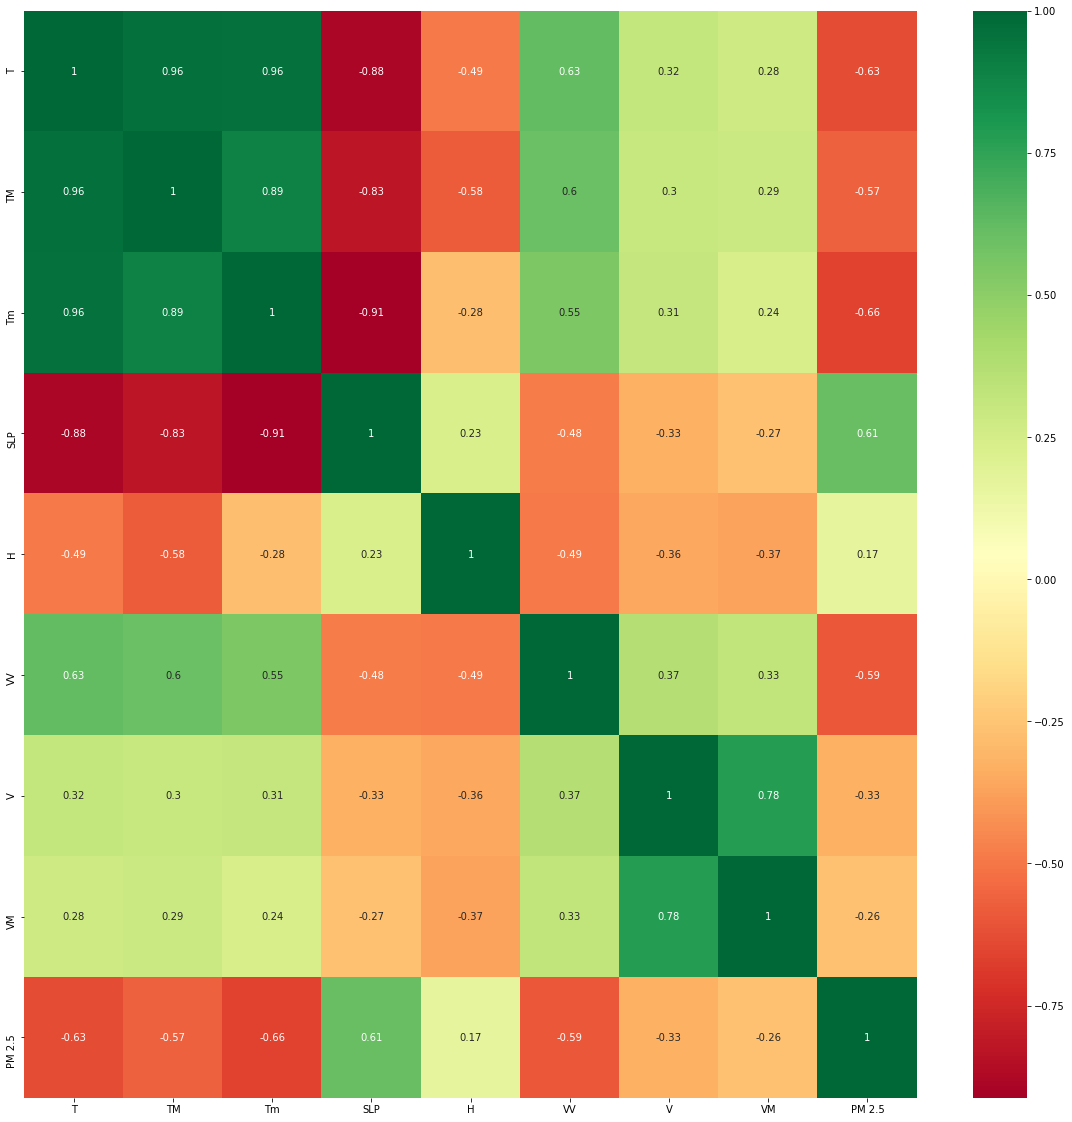

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [17]:
x.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [18]:
print(model.feature_importances_)

[0.15857259 0.09600179 0.19929637 0.15529468 0.079385   0.20736894
 0.05918823 0.04489241]


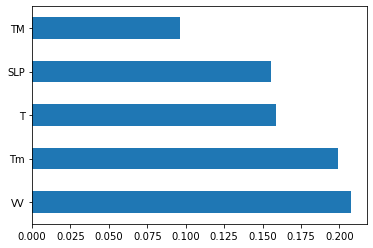

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Decision Tree Regressor 

In [21]:
sns.distplot(y)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

### Train Test split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dtree=DecisionTreeRegressor(criterion="mse")

In [25]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [33]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(x_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.23894350627918803


In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [35]:
score.mean()

0.03223275016771454

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [39]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [40]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to e:\anaconda\lib\site-packages\scikit_learn-0.23.2.dist-info\
   from E:\anaconda\Lib\site-packages\~cikit_learn-0.23.2.dist-info
  Moving to e:\anaconda\lib\site-packages\sklearn\
   from E:\anaconda\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'E:\anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-cu3ixdc1\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-cu3ixdc1\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Dell\AppData\Local\Temp\pip-wheel-nrb_08p8'
       cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-cu3ixdc1\scikit-learn\
  Complete output (678 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['E:/anaconda\\Library\\lib']
    NOT AVAILABLE
  
  blis_info:
    libraries bli

In [41]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [42]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.803625 to fit



#### Model Evaluation

In [43]:
prediction=dtree.predict(x_test)

In [44]:
sns.distplot(y_test-prediction)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

In [45]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning DEcision Tree Regressor 

In [ ]:
DecisionTreeRegressor()

In [46]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [47]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [48]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [49]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [50]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 60432 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 72208 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 85008 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 2 minutes and 22.4 seconds.


In [51]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [52]:
random_search.best_score_

-3316.3027477431124

In [53]:
predictions=random_search.predict(x_test)

In [54]:
sns.distplot(y_test-predictions)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 38.865872514663266
MSE: 3151.025436913304
RMSE: 56.13399537636087


## Regression Evaluation Metrics


In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 46.932313965341486
MSE: 4912.453184569317
RMSE: 70.0888948733629


In [58]:
import pickle 

In [59]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)